<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Reviewer's comment v1</h1>

Hello Anna, my name is Dmitrii. Happy to review your project! 🙌

You can find my comments under the heading **«Review»**. I will categorize my comments in green, blue or red boxes like this:

<div class="alert alert-success">
    <b>Success:</b> if everything is done successfully
</div>
<div class="alert alert-warning">
    <b>Remarks:</b> if I can give some recommendations or ways to improve the project
</div>
<div class="alert alert-danger">
    <b>Needs fixing:</b> if the block requires some corrections. Work can't be accepted with the red comments
</div>

Please don't remove my comments :) If you have any questions don't hesitate to respond to my comments in a different section. 
<div class="alert alert-info"> <b>Student comments:</b> For example like this</div>    


<div style="border:solid green 2px; padding: 20px">
<b>Reviewer's comment v1:</b>
    
<b>Overall Feedback</b> 
    
- Overall well done! I can see that a lot of effort has been made! Your project already looks really good and you accomplished impressive results.
    
    
- However, there are some comments/areas left to fix that will help you to make your project even better:
    - Extend hypotheses formulations. 
  
And of course, if you have any questions along the way, remember that you can always reach out to your tutor for any clarification.

I will wait for you to send me a new version of the project :)

    
</div>

<div style="border:solid green 2px; padding: 20px">
<b>Reviewer's comment v2:</b>
    
<b>Overall Feedback</b> 
    
- Hello Anna, thank you for making corrections and improvements in your project.
- Now no critical issues left, so your project has been accepted! 
- To learn further about A/B testing, I can recommend the following articles:
  - https://towardsdatascience.com/a-collection-of-a-b-testing-learning-resources-newbie-to-master-6bab1e0d7845 or this cool book "Trustworthy Online Controlled Experiments: A Practical Guide to A/B Testing"
  - https://www.dynamicyield.com/lesson/introduction-to-ab-testing/
    
Please keep up the great work and good luck on the next project! 
  
</div>

# A/B testing for online store

The project is about boosting revenue at a big online store.

There is a list of hypotheses which we need to prioritize, launch an A/B test, and analyze the results.

<div class="alert alert-warning">
<b>Reviewer's comment v1:</b>
    
Additionally, it would be great to leave a more detailed description of the project, data and tasks. The description of the project is an important part of the work, as it provides input for the reader (whether it be a peer reviewer or someone from business). At this stage, it is also useful to perform task decomposition.

## Download the data and prepare it for analysis

In [1]:
# Loading all the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import datetime as dt
from scipy import stats as st

In [2]:
# Load the data
try:
    hypotheses = pd.read_csv('hypotheses_us.csv', sep=';')
except:
    hypotheses = pd.read_csv('/datasets/hypotheses_us.csv', sep=';')
try:
    orders = pd.read_csv('orders_us.csv')
except:
    orders = pd.read_csv('/datasets/orders_us.csv')
try:
    visits = pd.read_csv('visits_us.csv')
except:
    visits = pd.read_csv('/datasets/visits_us.csv')
    
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
visits['date'] = visits['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

# Description of the data

The `hypotheses` table:

- **Hypotheses**— brief descriptions of the hypotheses

- **Reach** — user reach, on a scale of one to ten

- **Impact** — impact on users, on a scale of one to ten

- **Confidence** — confidence in the hypothesis, on a scale of one to ten

- **Effort** — the resources required to test a hypothesis, on a scale of one to ten. The higher the Effort value, the more resource-intensive the test

The `orders` table:

- **transactionId** — order identifier

- **visitorId** — identifier of the user who placed the order

- **date** — date of the order

- **revenue** - revenue from the order

- **group** - the A/B test group that the user belongs to

The `visits` table:

- **date** — date

- **group** — A/B test group

- **visits**  — the number of visits on the date specified in the A/B test group specified

In [3]:
hypotheses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [4]:
pd.options.display.max_colwidth = 100
hypotheses

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10
2,Add product recommendation blocks to the store's site. This will increase conversion and average...,8,3,7,3
3,Change the category structure. This will increase conversion since users will find the products ...,8,3,3,8
4,Change the background color on the main page. This will increase user engagement,3,1,1,1
5,Add a customer review page. This will increase the number of orders,3,2,2,3
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5


In [5]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   float64       
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 46.9+ KB


In [6]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


Check the columns range of values.

In [7]:
orders['date'].describe(datetime_is_numeric=True)

count                             1197
mean     2019-08-15 13:06:46.015037696
min                2019-08-01 00:00:00
25%                2019-08-08 00:00:00
50%                2019-08-15 00:00:00
75%                2019-08-23 00:00:00
max                2019-08-31 00:00:00
Name: date, dtype: object

We have data for August of 2019.

In [8]:
orders['group'].value_counts(dropna=False)

B    640
A    557
Name: group, dtype: int64

In [9]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [10]:
visits.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


# Get info on data

Let's remove upper cases from columns names and check the data for mistakes.

In [11]:
# renaming columns
hypotheses.columns= hypotheses.columns.str.lower()
orders.columns= orders.columns.str.lower()

In [12]:
# Let's check if there is any duplicates in data
print(hypotheses.duplicated().sum())
print(orders.duplicated().sum())
print(visits.duplicated().sum())

0
0
0


No missing values and duplicates were identified.

Let's check if there are zero values in revenue data

In [13]:

(orders['revenue'] == 0).sum()

0

Revenue data are correct (at least without zeros)

In [14]:
orders['revenue'].describe()

count     1197.000000
mean       131.491646
std        603.004729
min          5.000000
25%         20.800000
50%         50.200000
75%        130.400000
max      19920.400000
Name: revenue, dtype: float64

There is a variability of data - it seems we will need to correct data. But no negative values were identified.

In [15]:
# Checking if there are mistakes in group data - both A and B groups are aligned with the same visitor id
groupA = orders[orders.group == 'A'].visitorid.unique().tolist()
print('Group A - {}'.format(len(groupA)))
groupB = orders[orders.group == 'B'].visitorid.unique().tolist()
print('Group B - {}'.format(len(groupB)))

double_group = [value for value in groupA if value in groupB] 
print('Users in the both groups - {}'.format(len(double_group)))

Group A - 503
Group B - 586
Users in the both groups - 58


Let's remove rows with such ids wich are both in A and B group - as we can't choose the proper group for them.

In [16]:
orders_clean=orders[~orders.visitorid.isin(double_group)]

Now the data looks good and we can start to analyse it.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
Great that you have a very detailed data preprocessing part.

In general, the situation with the same users in both groups is unpleasant and on a real project it is worth asking the one who collected the data what went wrong. In this case, there are not so many users, so they can also be left as is.


<div class="alert alert-block alert-warning">
<b>Reviewer's comment v1:</b>
    
However, we will not be able to identify user data in the table with visits, and deleting them from only one table with orders will not be entirely correct for further analysis.

## Prioritizing Hypotheses

Let's apply ICE framework for prioritizing Hypotheses. ICE is calculated as product of Impact and of Confidence, divided by Efforts.

In [17]:
hypotheses['ICE'] = (hypotheses['impact'] * hypotheses['confidence'] / hypotheses['effort']).round()
hypotheses.drop(['reach','impact','confidence','effort'], axis=1).sort_values(by='ICE',ascending=False)

,hypothesis,ICE
8,Launch a promotion that gives users discounts on their birthdays,16.0
0,Add two new channels for attracting traffic. This will bring 30% more users,13.0
7,Add a subscription form to all the main pages. This will help you compile a mailing list,11.0
6,Show banners with current offers and sales on the main page. This will boost conversion,8.0
2,Add product recommendation blocks to the store's site. This will increase conversion and average...,7.0
1,Launch your own delivery service. This will shorten delivery time,2.0
3,Change the category structure. This will increase conversion since users will find the products ...,1.0
4,Change the background color on the main page. This will increase user engagement,1.0
5,Add a customer review page. This will increase the number of orders,1.0


<div class="alert alert-block alert-warning">
<b>Reviewer's comment v1:</b>

    
Additionally, would be nice to round the ICE metric and create an overall table with ICE and RICE.

<div class="alert alert-info"> <b>Student comments:</b> Done!</div>    

<div class="alert alert-success">
<b>Reviewer's comment v2:</b>
    
🙌

After ICE framework implementation we identfied the leader - a promotion that gives users discounts on their birthdays.
In general conditions promotion effect users a lot, and there is a high level of assurance that effect is assessed properly.
Other attractive variants are adding of two new channels for attracting traffic and adding of a subscription form to all the main pages.

Let's apply ICE framework for now.

In [18]:
hypotheses['RICE'] = hypotheses['reach'] * hypotheses['impact'] * hypotheses['confidence'] / hypotheses['effort']
hypotheses.drop(['reach','impact','confidence','effort'], axis=1).sort_values(by='RICE',ascending=False)

,hypothesis,ICE,RICE
7,Add a subscription form to all the main pages. This will help you compile a mailing list,11.0,112.0
2,Add product recommendation blocks to the store's site. This will increase conversion and average...,7.0,56.0
0,Add two new channels for attracting traffic. This will bring 30% more users,13.0,40.0
6,Show banners with current offers and sales on the main page. This will boost conversion,8.0,40.0
8,Launch a promotion that gives users discounts on their birthdays,16.0,16.2
3,Change the category structure. This will increase conversion since users will find the products ...,1.0,9.0
1,Launch your own delivery service. This will shorten delivery time,2.0,4.0
5,Add a customer review page. This will increase the number of orders,1.0,4.0
4,Change the background color on the main page. This will increase user engagement,1.0,3.0


RICE framework gives another result: the leader is adding of a subscription form to all the main pages. 


<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
Overall great job! The `ICE` and `RICE` frameworks have been calculated correctly. And from the results, it is now clear how the reach factor (Reach) affects the overall value of the hypothesis.

Additionally, it would be really cool to create a pair plot to compare all the metrics for each hypothesis and compare them.
    
For an outside reader (for example, a business customer) it would also be interesting to add a brief description of the frameworks and how they work.
    
Interesting examples of using these methods can be found here:
    https://hackernoon.com/finding-winning-ideas-using-the-confidence-tool-d8f2d8cc2c15

## A/B Test Analysis

Let's group the required results into a dataframe where one row is on testing day.

We'll create a dataset with amount of visitors by day in group A.


In [19]:
visitorsADaily = visits[visits['group']=='A'][['date', 'visits']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']
visitorsADaily.head(10)

,date,visitorsPerDateA
0,2019-08-01,719
1,2019-08-02,619
2,2019-08-03,507
3,2019-08-04,717
4,2019-08-05,756
5,2019-08-06,667
6,2019-08-07,644
7,2019-08-08,610
8,2019-08-09,617
9,2019-08-10,406


Now let's create a dataset with cumulative data with amount of visitors by days.


In [20]:
visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']
visitorsACummulative.head(10)

,date,visitorsCummulativeA
0,2019-08-01,719
1,2019-08-02,1338
2,2019-08-03,1845
3,2019-08-04,2562
4,2019-08-05,3318
5,2019-08-06,3985
6,2019-08-07,4629
7,2019-08-08,5239
8,2019-08-09,5856
9,2019-08-10,6262


Let's prepare corresponding datasets for group B.

In [21]:
visitorsBDaily = visits[visits['group']=='B'][['date', 'visits']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']
visitorsBCummulative.head(10)

,date,visitorsCummulativeB
31,2019-08-01,713
32,2019-08-02,1294
33,2019-08-03,1803
34,2019-08-04,2573
35,2019-08-05,3280
36,2019-08-06,3935
37,2019-08-07,4644
38,2019-08-08,5298
39,2019-08-09,5908
40,2019-08-10,6277


Let's create a dataset where we'll group by dates all the information about amount of orders and buyers and total revenue.


In [22]:
ordersADaily = orders[orders['group']=='A'][['date', 'transactionid','visitorid','revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionid' : 'nunique', 'visitorid' : 'nunique',  'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'buyersPerDateA', 'revenuePerDateA']
ordersADaily.head(10)

,date,ordersPerDateA,buyersPerDateA,revenuePerDateA
0,2019-08-01,24,20,2356.8
1,2019-08-02,20,19,1503.5
2,2019-08-03,24,24,1815.2
3,2019-08-04,16,15,1146.6
4,2019-08-05,25,25,1988.1
5,2019-08-06,18,15,789.8
6,2019-08-07,18,18,2242.9
7,2019-08-08,16,16,1530.4
8,2019-08-09,16,14,2947.1
9,2019-08-10,16,16,3288.2


In [23]:
# creating a dataset with cumulative data about orders amount and revenue by days for group A.
ordersACummulative = ordersADaily.apply(
    lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']
ordersACummulative.head(10)

,date,ordersCummulativeA,revenueCummulativeA
0,2019-08-01,24,2356.8
1,2019-08-02,44,3860.3
2,2019-08-03,68,5675.5
3,2019-08-04,84,6822.1
4,2019-08-05,109,8810.2
5,2019-08-06,127,9600.0
6,2019-08-07,145,11842.9
7,2019-08-08,161,13373.3
8,2019-08-09,177,16320.4
9,2019-08-10,193,19608.6


Let's prepare corresponding datasets for group B.

In [24]:
ordersBDaily = orders[orders['group']=='B'][['date', 'transactionid', 'visitorid', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionid' : 'nunique', 'visitorid' : 'nunique', 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'buyersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']
ordersBCummulative.head(10)

,date,ordersCummulativeB,revenueCummulativeB
0,2019-08-01,21,1620.0
1,2019-08-02,45,4243.8
2,2019-08-03,61,6050.6
3,2019-08-04,78,7767.9
4,2019-08-05,101,9262.9
5,2019-08-06,129,13069.3
6,2019-08-07,153,16600.8
7,2019-08-08,180,20088.6
8,2019-08-09,205,22646.7
9,2019-08-10,228,24367.1


In [25]:
data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')

data.head(5)

,date,ordersPerDateA,buyersPerDateA,revenuePerDateA,ordersPerDateB,buyersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,20,2356.8,21,20,1620.0,24,2356.8,21,1620.0,719,713,719,713
1,2019-08-02,20,19,1503.5,24,23,2623.8,44,3860.3,45,4243.8,619,581,1338,1294
2,2019-08-03,24,24,1815.2,16,16,1806.8,68,5675.5,61,6050.6,507,509,1845,1803
3,2019-08-04,16,15,1146.6,17,16,1717.3,84,6822.1,78,7767.9,717,770,2562,2573
4,2019-08-05,25,25,1988.1,23,23,1495.0,109,8810.2,101,9262.9,756,707,3318,3280


Now we can make a plot for cumulative revenue by groups.

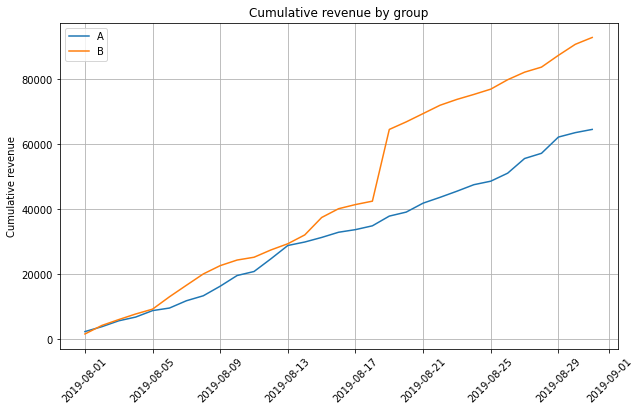

In [28]:
plt.rcParams['figure.figsize']=(10,6)
plt.plot(data['date'], data['revenueCummulativeA'], label='A')
plt.plot(data['date'], data['revenueCummulativeB'], label='B')
plt.title('Cumulative revenue by group')
plt.ylabel('Cumulative revenue')
plt.legend()
plt.xticks(rotation = 45)
plt.grid()
plt.show()

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
Very nice data visualization and correct conclusions. 

It is a matter of taste, but you can also use `plt.grid()` to add grid to your graph and rotate x-axis ticks.

You can also make your graph a litte bit bigger using `plt.rcParams["figure.figsize"]=(9,9)`. 

<div class="alert alert-info"> <b>Student comments:</b> Yes, now it looks better, thank you! </div>    

<div class="alert alert-success">
<b>Reviewer's comment v2:</b>
    
One minor remark is that plt.rcParams['figure.figsize']=(6,10) or figsize should go as a first line, as this code creates a container where the graph will be created. 

Revenue for group B is higher but there is a sharp spike at the second half of the test - there could an abnormal major purchase.



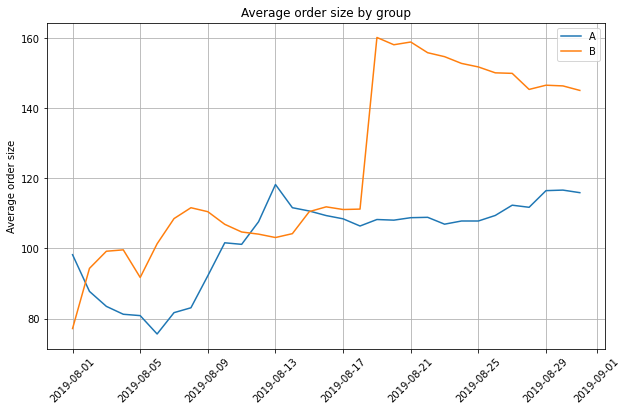

In [29]:
# preparing a plot for cumulative average order size by group.
plt.rcParams['figure.figsize']=(10,6)
plt.plot(data['date'], data['revenueCummulativeA']/data['ordersCummulativeA'], label='A')
plt.plot(data['date'], data['revenueCummulativeB']/data['ordersCummulativeB'], label='B')
plt.title('Average order size by group')
plt.ylabel('Average order size')
plt.legend()
plt.xticks(rotation = 45)
plt.grid()

plt.show()

Again, we observe a sharp spike - now for cumulative average order size for group B - it seems there is a major purchase at the second half of the test.

Let's prepare a graph of relative difference in cumulative average order size for group B compared with group A.


<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
Once again everything is correct here.

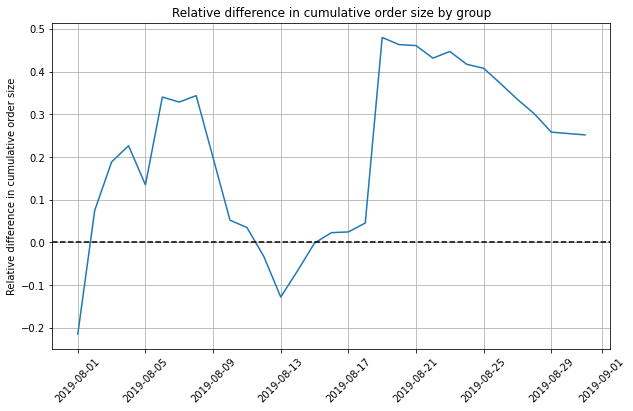

In [30]:
plt.rcParams['figure.figsize']=(10,6)
plt.plot(data['date'], 
         (data['revenueCummulativeB']/data['ordersCummulativeB'])
         /(data['revenueCummulativeA']/data['ordersCummulativeA'])-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Relative difference in cumulative order size by group')
plt.ylabel('Relative difference in cumulative order size')
plt.xticks(rotation = 45)
plt.grid()
plt.show()

There is a sharp fluctuation on the graph which also a result of major purcahses.

Let's plot the daily conversion rates of the two groups and describe the difference. 

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
Indeed, it could be helpful to study data without outliers. Also, interesting to note that difference has been stabilized in the last couple of days.

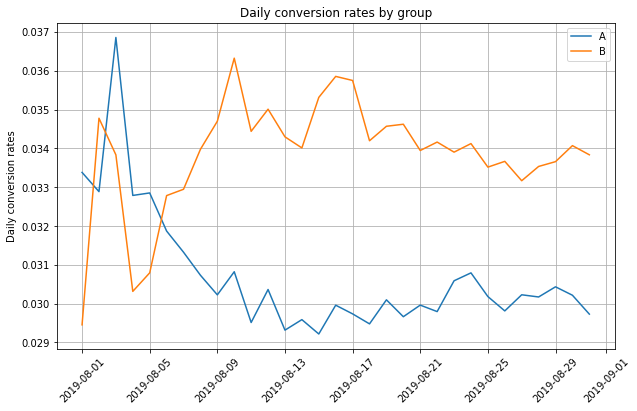

In [31]:
plt.rcParams['figure.figsize']=(10,6)
plt.plot(data['date'], data['ordersCummulativeA']/data['visitorsCummulativeA'], label='A')
plt.plot(data['date'], data['ordersCummulativeB']/data['visitorsCummulativeB'], label='B')
plt.legend()
plt.title('Daily conversion rates by group')
plt.ylabel('Daily conversion rates')
plt.xticks(rotation = 45)
plt.grid()
plt.show()

The difference between groups are not very high, conversion for group B is about 0.4-0.5 points higher than for group A.

Let's also plot the relative difference of cumulative conversion of group B to group A.


<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
Correct results and conclusions, and based on this graph it is easier to say that group B is showing better results.

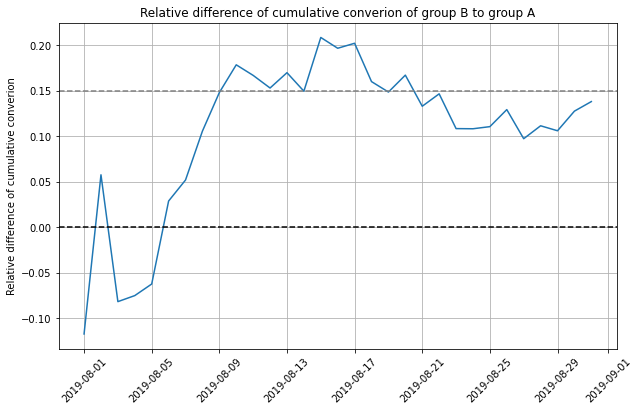

In [34]:
plt.rcParams['figure.figsize']=(10,6)
plt.plot(data['date'], 
         (data['ordersCummulativeB']/data['visitorsCummulativeB'])
         /(data['ordersCummulativeA']/data['visitorsCummulativeA'])-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')
plt.title('Relative difference of cumulative converion of group B to group A')
plt.ylabel('Relative difference of cumulative converion')
plt.xticks(rotation = 45)
plt.grid()
plt.show()

Cumulative conversion for group B is about 10-15% higher.


<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>

It's great that you're correctly using plt.axhline. Additionally we can also mention some stabilization in the last days of the experiment. 

Let's plot a scatter chart of the number of orders per user. 



In [35]:
# Grouping data
ordersByUsers = orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorid', as_index=False).agg({'transactionid' : pd.Series.nunique})
ordersByUsers.columns = ['visitorid','orders']
ordersByUsers.sort_values(by='orders',ascending=False).head(10)

,visitorid,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


There are several customers with high amount of orders (more than 5).

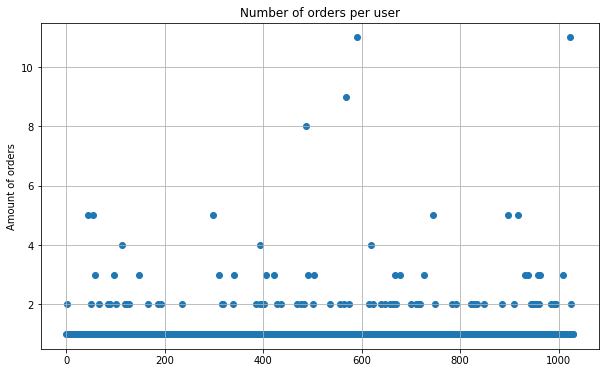

In [36]:
plt.rcParams['figure.figsize']=(10,6)
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders'])
plt.title('Number of orders per user')
plt.ylabel('Amount of orders')
plt.grid()
plt.show()

Common amount of orders is 1 or 2. High amount of orders is not common at all, but for now we can't conclude is it abnormality or not.

Let's calculate the 95th and 99th percentiles for the number of orders per user.


In [37]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([2., 4.])

Let's have a look at the share of users with 2 or more orders.

In [38]:
len(ordersByUsers.query('orders > 2'))/len(ordersByUsers)

0.029097963142580018

The share is less than 3%. We should remove users with more than 2 orders during tested month (orders amount more than 2 are abnormal).

Let's plot a scatter chart of order prices.


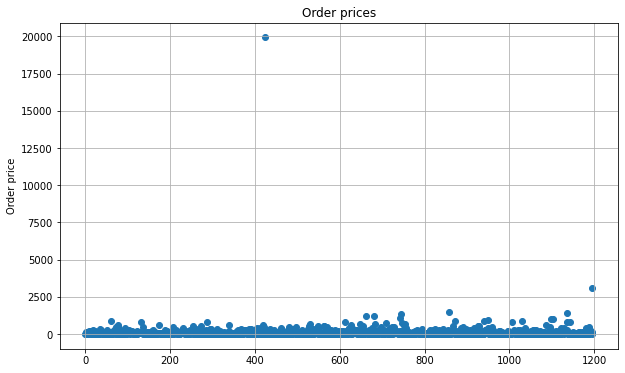

In [39]:
plt.rcParams['figure.figsize']=(10,6)
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.title('Order prices')
plt.ylabel('Order price')
plt.grid()
plt.show()

It's hard to analyze the chart because of abnormal purchase.

Let's set the axis.

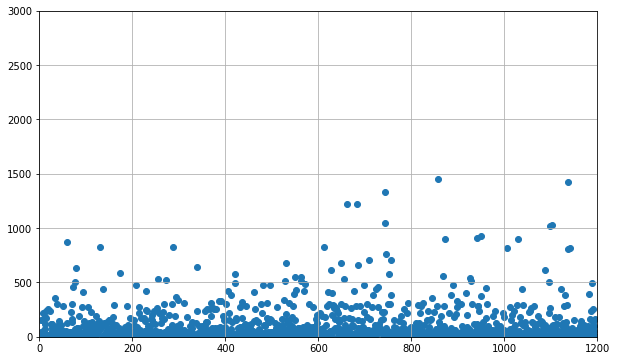

In [40]:
plt.rcParams['figure.figsize']=(10,6)
plt.scatter(x_values, orders['revenue'])
plt.axis([0, 1200, 0, 3000])
plt.grid()


It seems we can exclude orders which are above 750 - but we need to check it statistically.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
Great scaterplots. Additionally you can color two groups on this graph using other 'hue' parameter (https://seaborn.pydata.org/generated/seaborn.scatterplot.html) or different data sources (https://moonbooks.org/Articles/How-to-create-a-scatter-plot-with-several-colors-in-matplotlib-/)
    
Great that you created another scaterplot but without outliers. 

In [41]:
np.percentile(orders['revenue'], [95, 99])

array([435.54 , 900.904])

Optimal cutoff point is between 435 and 900. Let's choose 700 as a cutoff. 

Let's calculate amount of users we'll exclude by considering as abnormal those ones who made more that 2 orders or made purchases higher than 700 units. 


<div class="alert alert-block alert-warning">
<b>Reviewer's comment v1:</b>
    
You correctly identified 95th and 99th percentiles of order prices. However, I can recommend using 95 or 99 threshold to filter data as it is quite challenging to explain later why exactly 700 has been selected. 

<div class="alert alert-info"> <b>Student comments:</b> You mean that it's better to take 435 or 900 as a threshold? Thank you!</div>    

<div class="alert alert-success">
<b>Reviewer's comment v2:</b>
    
Exactly, because then it is very easy to explain to the business. 

In [38]:
usersWithManyOrders = pd.concat([ordersByUsers[ordersByUsers['orders'] > 2]['visitorid']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 700]['visitorid']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.head())
print(abnormalUsers.shape)

1099    148427295
44      199603092
55      237748145
59      249864742
97      393266494
Name: visitorid, dtype: int64
(50,)


<div class="alert alert-block alert-warning">
<b>Reviewer's comment v1:</b>
    
It would be helpful not to hard code thresholds. This will help avoid mistakes in the future, especially if the project needs to be run on new data.

<div class="alert alert-info"> <b>Student comments:</b> For example like this</div>    

<div class="alert alert-block alert-success">
<b>Reviewer's comment v2:</b>
    
Sorry for not making it clear. In the code, it is better not to use numeric variables, because the data can be updated and the results will no longer be correct. It is better to use a code instead of manually entering numbers (in the query statement). This will reduce possible errors when reusing the code.

You can simply create variables where the percentile values are passed, or you can paste this directly into the data selection:

    max_revenue = int(np.percentile(orders["orders"], [95]))

Total amount of excluded users is 50. 

Before we would exclude tham let's find the statistical significance of the difference in conversion between the groups using the raw data.

We'll create dataframes ordersByUsersA and ordersByUsersB with ['visitorId', 'orders'] columns.

We also will find amount of made orders for users who made order at least once.


In [39]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorid', as_index=False).agg({'transactionid' : pd.Series.nunique})
ordersByUsersA.columns = ['visitorid', 'orders']
ordersByUsersA.head()

,visitorid,orders
0,8300375,1
1,11685486,1
2,54447517,1
3,66685450,1
4,78758296,1


In [40]:
ordersByUsersB = orders[orders['group']=='B'].groupby('visitorid', as_index=False).agg({'transactionid' : pd.Series.nunique})
ordersByUsersB.columns = ['visitorid', 'orders']
ordersByUsersB.head()

,visitorid,orders
0,5114589,1
1,6958315,1
2,8300375,1
3,39475350,1
4,47206413,1


Let's create sampleA and sampleB for which there will be a correspondance between users from different groups and amount of orders. If there are no orders the amount will be equal to zero. That is what to be done for prepare the samples for the Mann-Whitney U test.


In [41]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)
sampleA.value_counts()

0    18233
1      473
2       17
3        7
4        3
5        2
7        1
Name: orders, dtype: int64

In [42]:
sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)
sampleB.value_counts()

0    18330
1      552
2       23
3        5
4        4
5        1
6        1
Name: orders, dtype: int64

Now we are ready to calculate the Mann-Whitney criteria in order to find out if there are significant differences in conversion between the groups in raw data.

Also let's calculate relative conversion growth in group B.

The hypotheses we are going to test: 

H0: there are no statistically significant differences in conversion between groups A and B.

H1: there are statistically significant differences in conversion between groups A and B.

In [43]:
print('p-value: ', st.mannwhitneyu(sampleA, sampleB)[1])
print('relative conversion in group B: ', "{0:.3f}".format(sampleB.mean()/sampleA.mean()-1))


p-value:  0.016792355056752608
relative conversion in group B:  0.138


<div class="alert alert-block alert-warning">
<b>Reviewer's comment v1:</b>
    
I can advise not to round the p-value, as it can be quite small and rounding can affect the results of the test.

And also to specify in the print statement which number relates to what.

<div class="alert alert-info"> <b>Student comments:</b> Amended</div>    

<div class="alert alert-block alert-success">
<b>Reviewer's comment v2:</b>
    
👏

p-value is less than 0.05 - so H0 hypothesis (which states that there are no statistically significant differences in conversion between groups A and B) could be rejected.

On the basis of raw data visits are better converted in purchases in group B.

Now let's find the statistical significance of the difference in average order size between the groups using the raw data.
We'll calculate the Mann-Whitney criteria basing of revenue for both groups.

Also let's calculate relative difference in average order size between groups.


<div class="alert alert-danger">
<b>Reviewer's comment v1:</b>
    
Сould you please formulate also an alternative hypothesis for each question before actual testing in the markdown box: 
   
    H0: 
    H1:
    
In that way it will be clear what we are trying to test. 

<div class="alert alert-info"> <b>Student comments:</b> I have added hypotheses description, thank you! </div>    

The hypotheses we are going to test:

H0: there are no statistically significant differences in order size between groups A and B.

H1: there are statistically significant differences in order size between groups A and B.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v2:</b>
    
Hypotheses have been formulated correctly.

In [44]:
print('p-value: ', st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1])
print('relative order size in group B: ', "{0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-value:  0.6915246773264736
relative order size in group B:  0.252


Average order size is higher for group B. At the same time there is no significant differences between two groups (as p-value is less than level of significance equal to 0.05)

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
Correct test results.

For finding the statistical significance of the difference in conversion between the groups using the filtered data we need to create samples of users excluding abnormal ones.

In [45]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorid'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)
sampleAFiltered.value_counts()

0    18233
1      450
2       12
Name: orders, dtype: int64

Users with high orders amount are excluded.

In [46]:
sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorid'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)
sampleBFiltered.value_counts()

0    18330
1      536
2       16
Name: orders, dtype: int64

The hypotheses we are going to test:

H0: there are no statistically significant differences in conversion between groups A and B.

H1: there are statistically significant differences in conversion between groups A and B.

In [47]:
# Applying Mann-Whitney criteria for samples created.
print('p-value: ', st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1])
print('relative conversion in group B: ', "{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-value:  0.006812399859620533
relative conversion in group B:  0.186


P-value for filtered samples is lower than for the raw one. Again, H0 hypothesis (which states there are no statistically significant differences in conversion between groups A and B) could be rejected.

We confirmed that group B conversion is higher than group A one.

Let's find the statistical significance of the difference in average order size between the groups using the filtered data.

The hypotheses we are going to test:

H0: there are no statistically significant differences in average order size between groups A and B.

H1: there are statistically significant differences in average order size between groups A and B.

In [48]:
print('p-value: ', st.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'])[1])

print('relative average order size in group B: ', "{0:.3f}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'].mean() - 1))

p-value:  0.9415790579591642
relative average order size in group B:  0.034


Persentage difference decreased up to 3.4%, but statistical significance of the difference also declined.

We have no reasons to conclude that there are differences between average order between the groups.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
You got correct results for all tests.

I also want to add that the Mann-Whitney test is rank-based, so it is robust to outliers. This means that the data is ranked, an outlier will simply be recognized as a case that ranks one above (or below) the next observation, so outliers do not have a strong effect on the p-value.

## Conclusions

# Prioritizing Hypotheses

1. After ICE framework implimentation we identfied the leader - a promotion that gives users discounts on their birthdays. In general conditions promotion effect users a lot, and there is a high level of assurance that effect is assessed properly. 
2. The leader identified has low visitors' coverage as only small part of visitors can have birthdays during short period of time. Framework RICE recommends to add a subscription form to all the main pages - this will allow to cover all of page's visitors.

# A/B test analysis

1. Statistically significant differences in conversion between groups exist on the basis of raw and filtered data. Visits in group B have much higher conversion.
2. Cumulative conversion is about 10-15% better for group B.
3. No statistically significant differences in average order size  exist on the basis of raw and filtered data as well. 

Decision: stop the test, consider group B as a leader. Although average order didn't increase, it's not lower than in group A. At the same time conversion in group B is consistently higher.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b> 



Thank you for your work 🤝

You did a great research with correct intermediate conclusions, clean code and good visualization. You managed to correctly apply the frameworks for testing hypotheses, identify anomalies in the data and perform all the statistical tests.

I also fully agree with your test results. In this project, you can fall into the "peeking problem" and wait until there is a difference in metrics, but doing so is wrong. You can read more here: https://gopractice.io/blog/peeking-problem/#:~:text=by%20Oleg%20Yakubenkov-,Peeking%20problem%20%E2%80%93%20the%20fatal%20mistake%20in%20A%2FB%20testing%20and,A%2FB%20test%20is%20over
    


    
</div>